#Project overview

This notebook download NASDAQ futures data using the yfinance API, performs basic data prepartion and visualizes using candlestick charts.

##Preparing the environment

In [11]:
# Preparing the environment
!pip install mplfinance

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore")

##Downloading and preparing data from yfinance

In [2]:
# downloading 1h interval data for the full available period
nsdq = yf.download('NQ=F', interval = '1h', period='max')

# removing timezone info from index for compatibility
nsdq.index = nsdq.index.tz_localize(None)

# removing the second column level (ticker names) for further processing
nsdq.columns = nsdq.columns.get_level_values(0)

[*********************100%***********************]  1 of 1 completed


##Checking if the data was downloaded correctly




In [3]:
# checking if the data is correct
nsdq.head(5)


Price,Close,High,Low,Open,Volume
Datetime,,,,,
2023-11-20 16:00:00,16013.25,16021.25,15999.50,15999.50,0
2023-11-20 17:00:00,16010.75,16032.00,16003.50,16013.75,32096
2023-11-20 18:00:00,16070.75,16076.25,16010.25,16011.25,63997
2023-11-20 19:00:00,16094.50,16098.25,16058.75,16071.00,42014
2023-11-20 20:00:00,16088.75,16116.75,16075.50,16094.75,60847


In [6]:
 # limiting data to improve performance
data = nsdq.tail(100)

##Creating candlestick charts


In [10]:
# Candlestick chart using Plotly


fig = go.Figure(data=[go.Candlestick(
    x=data.index,
    open=data['Open'], high=data['High'],
    low=data['Low'], close=data['Close'],
    increasing_line_color = '#3283FE', decreasing_line_color = 'rgb(179,179,179)'
    )])

fig.update_layout(title='NASDAQ / Futures [1h]')
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

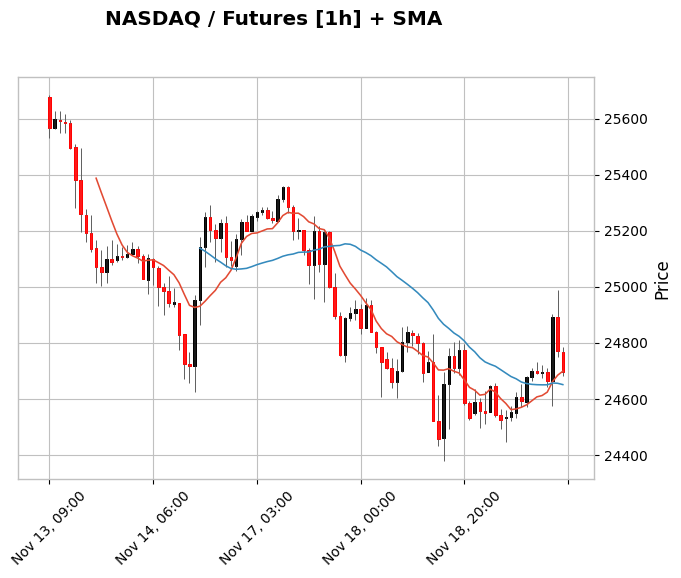

In [8]:
# candlestick chart using mplfinance with moving averages

mpf.plot(
    data,
    type='candle',
    title='NASDAQ / Futures [1h] + SMA',
    ylabel='Price',
    style='checkers',
    mav=(10,30)
)